# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/robertonacu/tmdb-kdramas-2022?select=networks.csv

Import the necessary libraries and create your dataframe(s).

***

In [1]:
#had to make copies of datasets to move into the folder for this checkpoint to access the files
#needed to get exact name of csvs so I used a "magic" line to access terminal here to navigate to folder and get exact csv names
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 7EB9-A76C

 Directory of C:\Users\Super\Desktop\Women+22\graded4\K-Dramas\cleaning-data-checkpoint

03/05/2023  11:44 PM    <DIR>          .
03/03/2023  01:37 PM    <DIR>          ..
12/28/2022  09:25 PM                23 .gitignore
03/04/2023  03:04 PM    <DIR>          .ipynb_checkpoints
03/05/2023  11:44 PM            36,884 checkpoint-three.ipynb
03/05/2023  11:40 PM               277 genre.csv
01/04/2023  04:38 PM               241 genres - Copy.csv
03/05/2023  11:44 PM           144,461 manipulation.ipynb
03/05/2023  11:40 PM             1,299 network_cleaned.csv
01/04/2023  04:38 PM             8,258 networks - Copy.csv
01/04/2023  04:38 PM           579,685 people - Copy.csv
03/05/2023  11:40 PM           640,916 people_cleaned.csv
01/04/2023  04:38 PM            19,189 production_companies - Copy.csv
01/04/2023  04:38 PM         1,011,711 series - Copy.csv
03/05/2023  11:40 PM           742,597 series_cleaned.csv
     

In [2]:
%cd cleaning-data-checkpoint

[WinError 2] The system cannot find the file specified: 'cleaning-data-checkpoint'
C:\Users\Super\Desktop\Women+22\graded4\K-Dramas\cleaning-data-checkpoint


In [3]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 7EB9-A76C

 Directory of C:\Users\Super\Desktop\Women+22\graded4\K-Dramas\cleaning-data-checkpoint

03/05/2023  11:44 PM    <DIR>          .
03/03/2023  01:37 PM    <DIR>          ..
12/28/2022  09:25 PM                23 .gitignore
03/04/2023  03:04 PM    <DIR>          .ipynb_checkpoints
03/05/2023  11:44 PM            36,884 checkpoint-three.ipynb
03/05/2023  11:40 PM               277 genre.csv
01/04/2023  04:38 PM               241 genres - Copy.csv
03/05/2023  11:44 PM           144,461 manipulation.ipynb
03/05/2023  11:40 PM             1,299 network_cleaned.csv
01/04/2023  04:38 PM             8,258 networks - Copy.csv
01/04/2023  04:38 PM           579,685 people - Copy.csv
03/05/2023  11:40 PM           640,916 people_cleaned.csv
01/04/2023  04:38 PM            19,189 production_companies - Copy.csv
01/04/2023  04:38 PM         1,011,711 series - Copy.csv
03/05/2023  11:40 PM           742,597 series_cleaned.csv
     

In [4]:
#import needed libraires with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Again, I will approach the 5 datasets individually for cleaning as I did for EDA.
    
# read in and name the 5 datasets
series = pd.read_csv("series - Copy.csv")
genres = pd.read_csv("genres - Copy.csv")
networks = pd.read_csv("networks - Copy.csv")
people = pd.read_csv("people - Copy.csv")
production_companies = pd.read_csv("production_companies - Copy.csv") #actually, I'm not keeping this one. many nulls and not needed for business issue.

***

<h1 style="background-color:gray; color:White; text-align:center">Missing Data</h1>


Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

***

### Series

In [5]:
series.shape

(1514, 22)

In [6]:
series.isnull().sum()
# keywords is missing a lot but I like it so am going to keep it...i think
# urls, director ids and production company ids can go because they are missing so much
# the episode air date columns are missing alot because its not applicable (these shows most likely have already ended. remember, a lot of shows end after one season. So if it aired before 2022 its most likely over. Also this data was complied in __? so it may be out of date depending on when you're reading this)

tmdb_id                        0
name                           0
original_name                  0
keywords                     542
airing_date                   64
poster_img_url                94
background_img_url           332
directors_ids               1350
cast_ids                      40
genres_ids                     0
number_of_seasons              4
number_of_episodes            13
episode_run_time             220
synopsis                      78
popularity                     0
average_rating               387
rating_count                 387
next_episode_to_air         1478
next_episode_air_date       1478
origin_country                46
networks_ids                 205
production_companies_ids     608
dtype: int64

In [7]:
# using a missing data percentage list because with such large total numbers it can be hard to eyeball how significant a missin quantity is overall 
# i didn't notice before that 3% of cast ids are missing. its low if it was something else, but if I'm 
    # basing my business issue on cast then do I need data/columns where there is no cast id?

for col in series.columns:
    pct_missing = np.mean(series[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
original_name - 0%
keywords - 36%
airing_date - 4%
poster_img_url - 6%
background_img_url - 22%
directors_ids - 89%
cast_ids - 3%
genres_ids - 0%
number_of_seasons - 0%
number_of_episodes - 1%
episode_run_time - 15%
synopsis - 5%
popularity - 0%
average_rating - 26%
rating_count - 26%
next_episode_to_air - 98%
next_episode_air_date - 98%
origin_country - 3%
networks_ids - 14%
production_companies_ids - 40%


<AxesSubplot:>

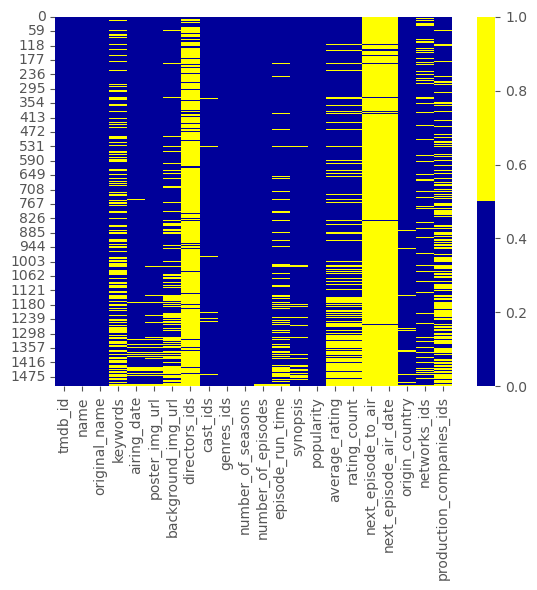

In [8]:
# Plot a heatmap of any missing data
#shows that are still on air (have a value in ?? columns don't have a value in average rating and rating count)
cols = series.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(series[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
# I want to get rid of 3% records that don't have values for cast_ids but i don't recall how 
# I am tempted to get rid of columns missing 20% or more but my curiosity of links
    #between keywords, average_rating, and next_episode_air_date and how they might 
    #correlate with popularity make me want to keep them

In [10]:
#removing all rows that have null values in the cast_ids column
#the new number or rows checks out because it is 40 less as expected (the sum of rows missing values for this column is 40 as found in a previous inquiry
series_cleaned = series.dropna(subset=['cast_ids'])
print(series_cleaned)

      tmdb_id                    name original_name  \
0      208249         Game of Witches        마녀의 게임   
1       99966      All of Us Are Dead     지금 우리 학교는   
2      112888             True Beauty          여신강림   
3       93405              Squid Game        오징어 게임   
4      211174  Vengeance of the Bride        태풍의 신부   
...       ...                     ...           ...   
1505    44717       Suspicious Family        수상한 가족   
1506    43594           Three Sisters           세자매   
1507    32850    Love Me When You Can     있을 때 잘해!!   
1508    18481            Romance Zero     하자 전담반 제로   
1510    16704                   Sunok           순옥이   

                                               keywords airing_date  \
0                                                   NaN  2022-10-11   
1     high school, bullying, based on comic, horror,...  2022-01-28   
2     high school, beauty, makeover, hidden identity...  2020-12-09   
3     secret organization, challenge, survival, fict...

<AxesSubplot:>

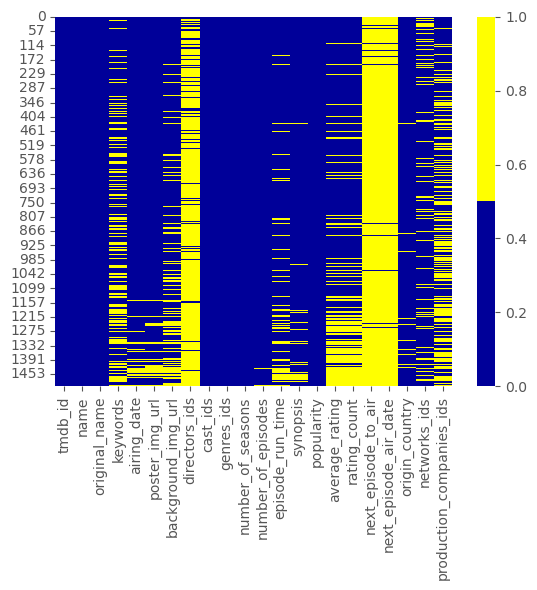

In [11]:
# Plot a heatmap to see if changes took and they did - no yellow (missing) in cast_ids column
cols = series_cleaned.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(series_cleaned[cols].isnull(), cmap=sns.color_palette(colours))

### Genres

In [12]:
#no missing data here!
genres.isnull().sum()

tmdb_id    0
name       0
dtype: int64

In [13]:
#dataset is complete with no missing values
for col in genres.columns:
    pct_missing = np.mean(genres[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%


### Networks

In [14]:
#not a lot of values in this dataset so I'm looking at percentages to see how big
    #of a deal it is to isnull sums like 29 and 14 from a column
    #since this is a small set, missing an entry for 29 records is a big impact
    #I'll only keep the first two columns from this set
    
#I don't need to take any action at this point but will drop several columns in the Irrelevanat data section
networks.isnull().sum()

tmdb_id            0
name               0
headquarters      29
homepage          14
logo_path         15
origin_country    14
dtype: int64

In [15]:
for col in networks.columns:
    pct_missing = np.mean(networks[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
headquarters - 38%
homepage - 18%
logo_path - 19%
origin_country - 18%


In [16]:
networks.columns

Index(['tmdb_id', 'name', 'headquarters', 'homepage', 'logo_path',
       'origin_country'],
      dtype='object')

<AxesSubplot:>

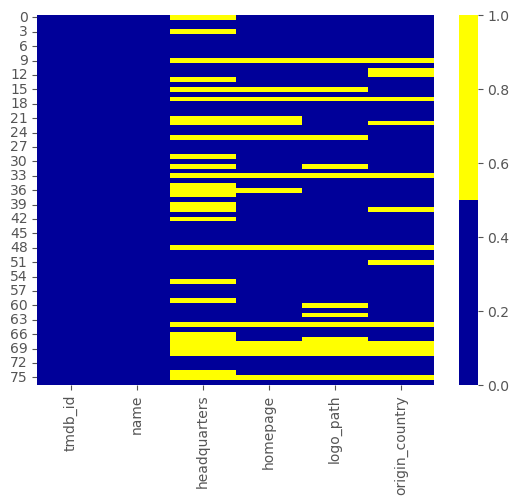

In [17]:
# Plot a heatmap of any missing data
cols = networks.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(networks[cols].isnull(), cmap=sns.color_palette(colours))

### People

In [18]:
people.shape

(3465, 10)

In [19]:
people.head()

,tmdb_id,name,biography,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,3686810,Kim Hyo Myung,NaN,NaN,1988-03-18,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...
1,3226942,Lee Chan-hyung,NaN,NaN,1997-11-03,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...
2,1347525,Park Seo-jun,Park Seo Jun is a South Korean actor. Born on ...,"Seoul, South Korea",1988-12-16,NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...
3,2318275,Yun Seul,NaN,"Busan, South Korea",1992-06-29,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...
4,1042230,Park Ye-eun,NaN,"Goyang, Gyeonggi, South Korea",1989-05-26,NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...


In [20]:
#lots and lots of nulls but I won't worry to clean specific rows because I am going to be dropping columns in another section of this notebook
#some of the columns Im keeping will have a lot of nulls but I don't want to drop the rows because they aren't the focus of the project BUT may make for interesting visualzation later if I filter out the nulls
for col in people.columns:
    pct_missing = np.mean(people[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
biography - 80%
place_of_birth - 47%
birthday - 18%
deathday - 99%
gender - 15%
known_for_department - 0%
popularity - 0%
profile_img_url - 21%


<AxesSubplot:>

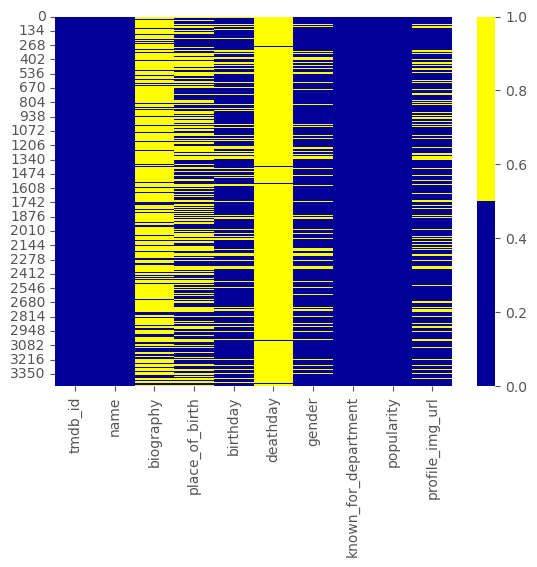

In [21]:
# Plot a heatmap of any missing data
cols = people.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(people[cols].isnull(), cmap=sns.color_palette(colours))

***

<h1 style="background-color:gray; color:White; text-align:center">Irregular Data</h1>

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

***

### Series

In [22]:
series.describe()

#1585 for max episode run time is an outlier and seems extreme and like a mistake unless its some show that followed people over the course of a day AND broadcast or uploaded it? 
    #I'll want to find this instance in cleaning checkpoint
# number of seasons looks accurate just from my knoweledge of watching shows, I noticed that a second season is rare, nearly non-existant
#1 min run time and 1 episode both sound suspicious. I think they are outliers. I'll have to find which show and verify its not a mistake. 
    #from my experience watching, I can say that most having an avg run time of over an hour sounds about right!
    
#honestly, all of the maxes look like outliers to me. I believe the rating_count max is going to be for Squid Games because that's the only one I've heard people who don't even like K-dramas talk about and its wildly popular

,tmdb_id,number_of_seasons,number_of_episodes,episode_run_time,popularity,average_rating,rating_count,next_episode_to_air
count,1514.000000,1510.000000,1501.000000,1294.000000,1514.000000,1127.000000,1127.000000,36.000000
mean,85302.124835,1.076159,26.246502,53.762751,10.598843,7.509714,51.498669,7.416667
std,49546.561615,0.527722,34.041101,54.882509,26.119971,1.308382,388.931765,12.248324
min,333.000000,1.000000,1.000000,1.000000,0.600000,0.500000,1.000000,1.000000
25%,50597.000000,1.000000,11.000000,35.000000,2.027000,7.000000,2.000000,1.000000
50%,75525.000000,1.000000,16.000000,60.000000,4.942500,7.800000,5.000000,2.000000
75%,113570.500000,1.000000,24.000000,65.000000,10.140250,8.300000,15.000000,7.500000
max,214406.000000,12.000000,476.000000,1585.000000,414.151000,10.000000,11835.000000,63.000000


In [23]:
series_cleaned.describe()

#1585 for max episode run time is an outlier and seems extreme and like a mistake unless its some show that followed people over the course of a day AND broadcast or uploaded it? 
    #I'll want to find this instance in cleaning checkpoint
# number of seasons looks accurate just from my knoweledge of watching shows, I noticed that a second season is rare, nearly non-existant
#1 min run time and 1 episode both sound suspicious. I think they are outliers. I'll have to find which show and verify its not a mistake. 
    #from my experience watching, I can say that most having an avg run time of over an hour sounds about right!
    
#honestly, all of the maxes look like outliers to me. I believe the rating_count max is going to be for Squid Games because that's the only one I've heard people who don't even like K-dramas talk about and its wildly popular

,tmdb_id,number_of_seasons,number_of_episodes,episode_run_time,popularity,average_rating,rating_count,next_episode_to_air
count,1474.000000,1474.000000,1466.000000,1271.000000,1474.000000,1109.000000,1109.000000,36.000000
mean,84924.698100,1.061737,26.276944,54.130606,10.793858,7.517417,52.275023,7.416667
std,49559.795208,0.426054,33.845660,55.231070,26.435678,1.307944,392.029516,12.248324
min,333.000000,1.000000,1.000000,1.000000,0.600000,0.500000,1.000000,1.000000
25%,48830.500000,1.000000,12.000000,35.000000,2.146500,7.000000,2.000000,1.000000
50%,74917.500000,1.000000,16.000000,60.000000,5.009000,7.800000,5.000000,2.000000
75%,112835.500000,1.000000,24.000000,65.000000,10.239750,8.300000,15.000000,7.500000
max,214406.000000,10.000000,476.000000,1585.000000,414.151000,10.000000,11835.000000,63.000000


array([[<AxesSubplot:title={'center':'tmdb_id'}>,
        <AxesSubplot:title={'center':'number_of_seasons'}>,
        <AxesSubplot:title={'center':'number_of_episodes'}>],
       [<AxesSubplot:title={'center':'episode_run_time'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'rating_count'}>,
        <AxesSubplot:title={'center':'next_episode_to_air'}>,
        <AxesSubplot:>]], dtype=object)

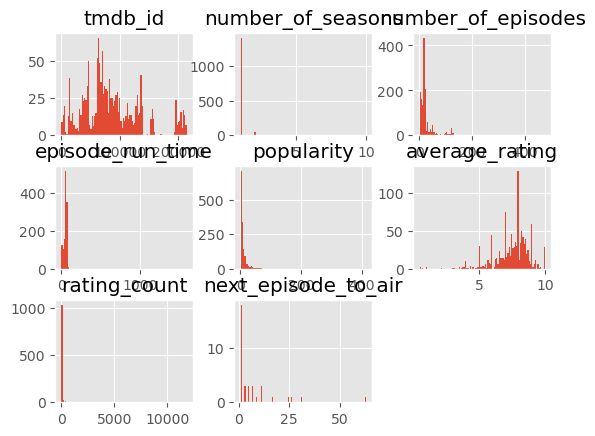

In [24]:
#looking for outliers in the data
series_cleaned.hist(bins=100)

<AxesSubplot:>

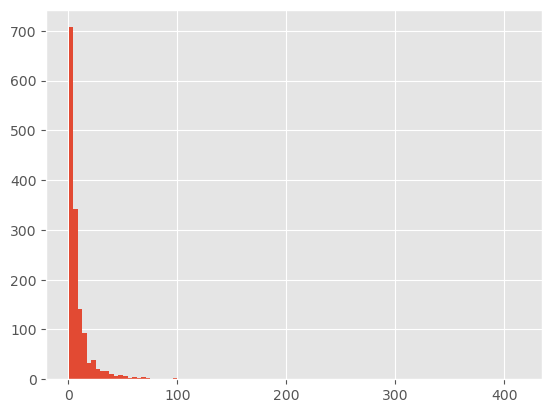

In [25]:
series_cleaned['popularity'].hist(bins=100)

<AxesSubplot:>

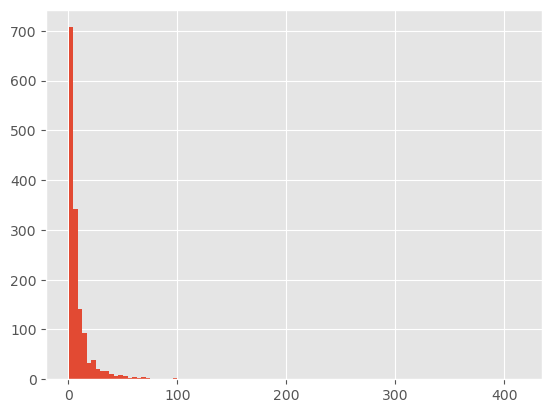

In [26]:
series_cleaned['popularity'].hist(bins=100)

<AxesSubplot:>

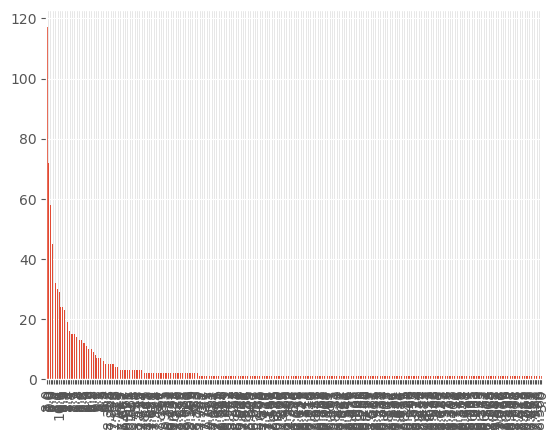

In [27]:
series_cleaned['average_rating'].value_counts().plot.bar()


<AxesSubplot:>

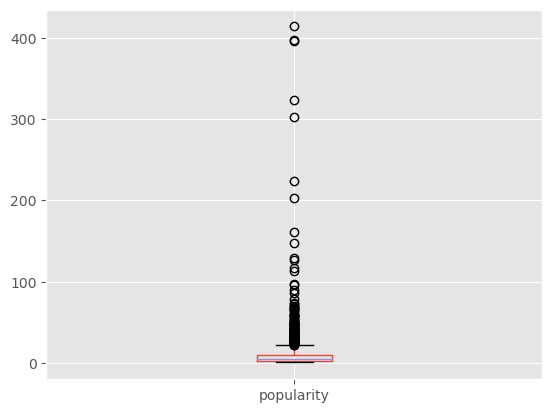

In [28]:
#I am struggling to know what to do with tis popularity column! I still feel its relevant but how can there be so many outliers?!
#The oddest boxplot I've seen
#It may have something to do with this being an infinite column and being from a larger dataset. For instance, if this number is based on popularity in the database overall 
    #(in competition with inernational shows and movies in English, then I think this shows K-dramas in general rank low on poularity but there are some K-dramas that surpass
    #expecations of the niche and are popular in the broader media sense)
series_cleaned.boxplot(column=['popularity'])

<AxesSubplot:>

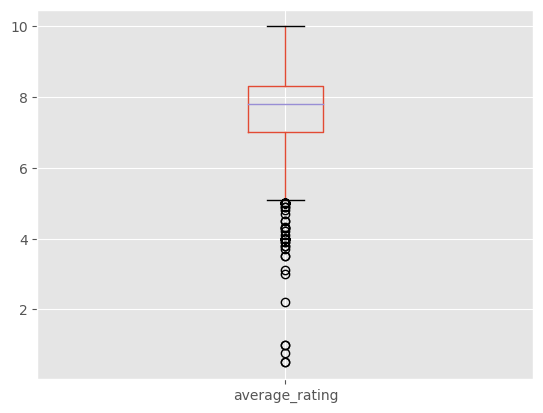

In [29]:
#well, okay, also odd but closer to what I'm used to seeing in a boxplot
#there are outliers but I wouldn't want to get rid of them because they reflect user ratings and I want to look at which series are the outliers
series_cleaned.boxplot(column=['average_rating'])

<AxesSubplot:>

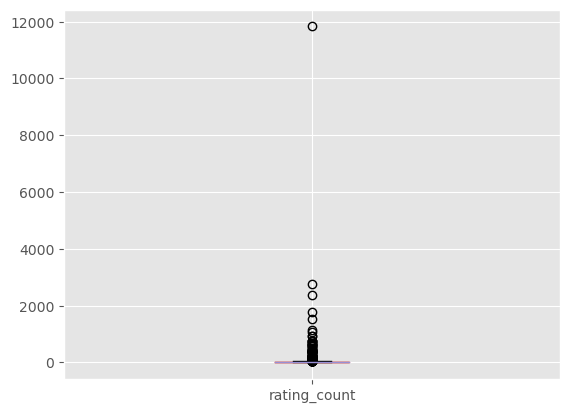

In [30]:
#Wow, I didn't realize how much of an outlier the one around 12,000 was. 
    #I knew most of the ones I saw when scrolling through it were under 2k but to see NOTHING between 4 and 12k is very telling. 
    #Boxplot very helpful in this case
    
#Now,the question is do I want to drop the outlier so it stops skewing data? And how much will this change the data, I wonder?
    #Thought about it, and if I was looking at something more general, I'd delete it, but I am wanting to look at popularity, ratings and actors
        #so if I removed it, it wouldn't show me the most rated, etc shows in the end
series_cleaned.boxplot(column=['rating_count'])

<AxesSubplot:>

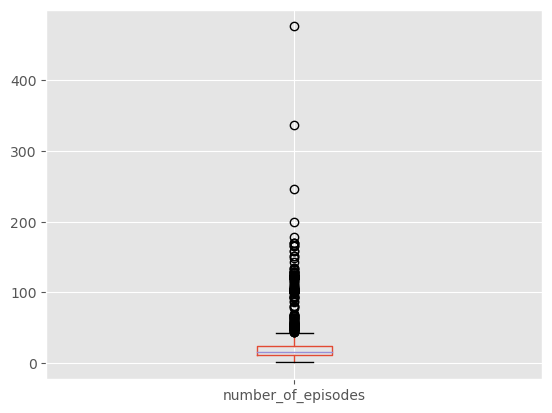

In [31]:
#There are tons of data outside the boxplot but there are 3 extreme outliers at around 240, 330, and 480
series_cleaned.boxplot(column=['number_of_episodes'])

### Genres

array([[<AxesSubplot:title={'center':'tmdb_id'}>]], dtype=object)

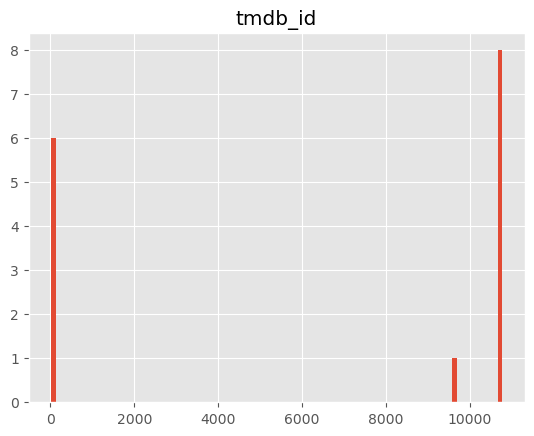

In [32]:
#the id numbers are unique and arbitrary so this doesn't show anything useful for analysis 
genres.hist(bins=100)

In [33]:
#this helps to show what the above bar graph numbers and distribution come from
genres.describe

<bound method NDFrame.describe of     tmdb_id                name
0        18               Drama
1        80               Crime
2      9648             Mystery
3     10759  Action & Adventure
4     10765    Sci-Fi & Fantasy
5        35              Comedy
6     10751              Family
7     10768      War & Politics
8     10766                Soap
9        36             History
10    10749             Romance
11    10764             Reality
12    10762                Kids
13       16           Animation
14       99         Documentary>

### Networks

array([[<AxesSubplot:title={'center':'tmdb_id'}>]], dtype=object)

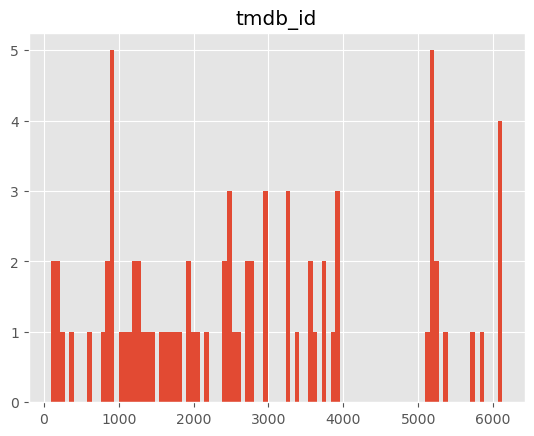

In [34]:
#nothing irregular found
networks.hist(bins=100)


In [35]:
networks.describe

<bound method NDFrame.describe of     tmdb_id        name                                       headquarters  \
0      3266  GagaOOLala                                                NaN   
1      1923     KBS Joy                                        Mapo, Seoul   
2      2974    Lifetime                                              Seoul   
3      1671     LINE TV                                                NaN   
4      3869      U-NEXT                        Kamiōsaki, Shinagawa, Tokyo   
..      ...         ...                                                ...   
72     2586      oksusu                           Jung, Seoul, South Korea   
73     2498  Tooniverse  66 Sangamsan-ro, Sangam-dong, Mapo-gu, Seoul, ...   
74      929         MBN                                                NaN   
75     2745  Daum tvPot                                                NaN   
76      934  OCN movies                         Seocho, Seoul, South Korea   

                            h

In [36]:
networks.describe()

,tmdb_id
count,77.000000
mean,2687.519481
std,1745.770819
min,97.000000
25%,1234.000000
50%,2487.000000
75%,3747.000000
max,6120.000000


### People

array([[<AxesSubplot:title={'center':'tmdb_id'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>]],
      dtype=object)

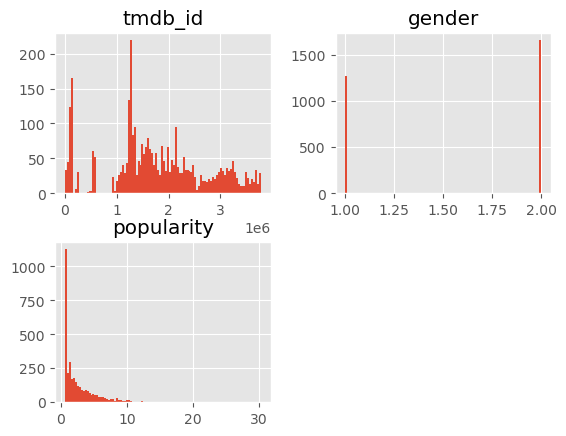

In [37]:
#looking for outliers in the data
people.hist(bins=100)

<AxesSubplot:>

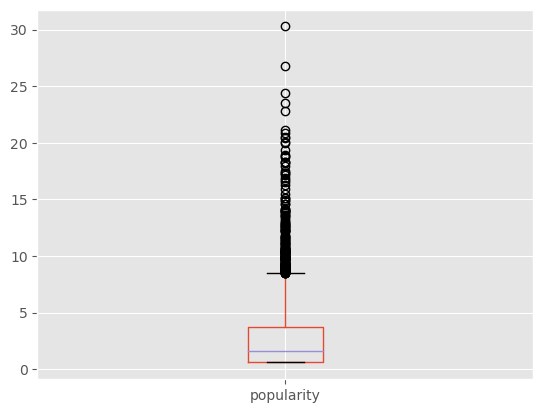

In [38]:
people.boxplot(column=['popularity'])

<AxesSubplot:>

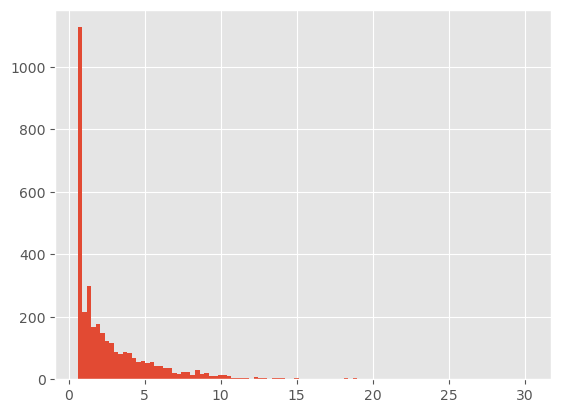

In [39]:
#Most of the popularity ratings for people are in the lower points, as is the poplarity in the series dataset
#I think that K-dramas and Korean actors and directors are overall much less popular than actors of shows recorded in English that have a wider audience
people['popularity'].hist(bins=100)

<AxesSubplot:>

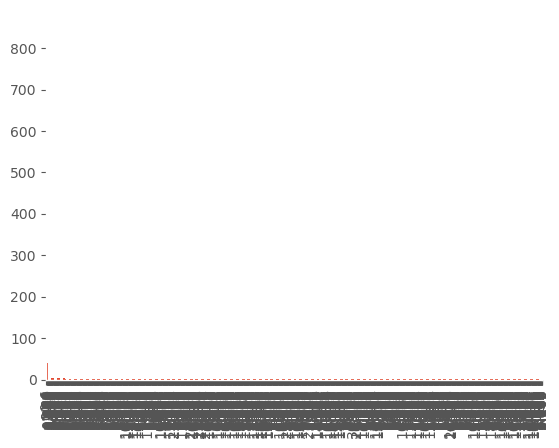

In [40]:
people['popularity'].value_counts().plot.bar()

<AxesSubplot:>

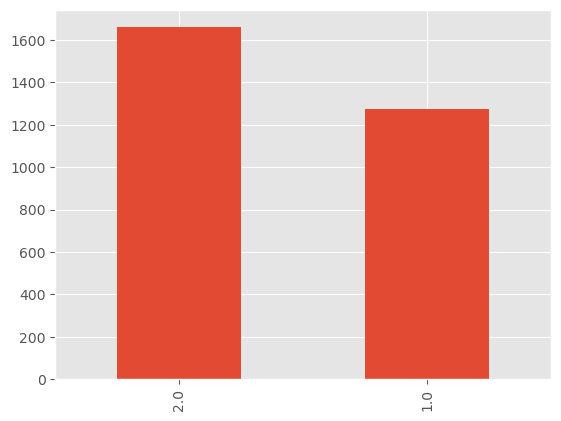

In [41]:
#Nothing irregular here. Just shows that there are more of gender 2 represented here
#About the name of the column, though, I might change this to sex because I doubt this represents thier actual gender - the terms are used interechangably too much in datasets I've seen
people['gender'].value_counts().plot.bar()

<AxesSubplot:>

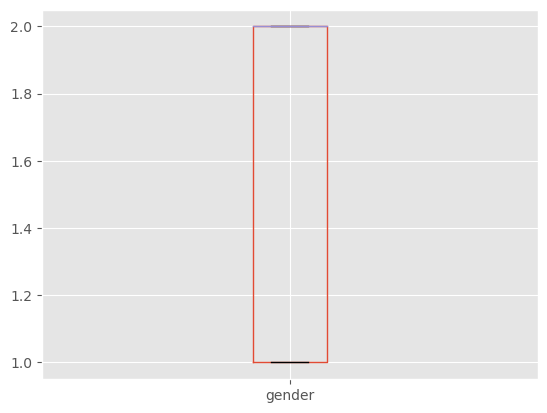

In [42]:
people.boxplot(column=['gender'])

***

In [43]:
# After all of that, I've decided to not do any cleaning for outliers

<h1 style="background-color:gray; color:White; text-align:center">Unnecessary Data</h1>

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

***

### Series

In [44]:
series_cleaned.columns

Index(['tmdb_id', 'name', 'original_name', 'keywords', 'airing_date',
       'poster_img_url', 'background_img_url', 'directors_ids', 'cast_ids',
       'genres_ids', 'number_of_seasons', 'number_of_episodes',
       'episode_run_time', 'synopsis', 'popularity', 'average_rating',
       'rating_count', 'next_episode_to_air', 'next_episode_air_date',
       'origin_country', 'networks_ids', 'production_companies_ids'],
      dtype='object')

In [45]:
#in general, i think all url columns can go. I don't need them. Unless I can use them some cool way to grab a poster or actor headshot in tableua somehow. Definitely don't need websites

#These columns can go:

#'original_name', 'poster_img_url', 'background_img_url', 

#maybe these: 
#'next_episode_to_air', 'next_episode_air_date',  'production_companies_ids'

#3-5- came back and cleaned more columns (as i tried to work on visualizations, i realized it wasn't worth the visual clutter to keep some columns

In [46]:
#dropping 5 columns. Could have done more but don't want to overclean at this point
series_cleaned = series_cleaned[['tmdb_id', 'name', 'airing_date', 'cast_ids',
       'genres_ids', 'number_of_seasons', 'number_of_episodes',
       'episode_run_time', 'synopsis', 'popularity', 'average_rating',
       'rating_count', 'next_episode_to_air', 'networks_ids']]

In [47]:
#making sure the list of columns reflects the changes I wanted to make and it does 
series_cleaned.columns

Index(['tmdb_id', 'name', 'airing_date', 'cast_ids', 'genres_ids',
       'number_of_seasons', 'number_of_episodes', 'episode_run_time',
       'synopsis', 'popularity', 'average_rating', 'rating_count',
       'next_episode_to_air', 'networks_ids'],
      dtype='object')

In [48]:
series_cleaned.shape

(1474, 14)

In [49]:
series_cleaned.head()

,tmdb_id,name,airing_date,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,networks_ids
0,208249,Game of Witches,2022-10-11,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,97
1,99966,All of Us Are Dead,2022-01-28,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,213
2,112888,True Beauty,2020-12-09,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN
3,93405,Squid Game,2021-09-17,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,213
4,211174,Vengeance of the Bride,2022-10-10,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,342


In [50]:
# we know that column 'tmdb_id' is unique. so dropping it temporarily to see if there are duplicate records
series_dedupped = series_cleaned.drop('tmdb_id', axis=1).drop_duplicates()

# there were no duplicate rows
print(series_cleaned.shape)
print(series_dedupped.shape)

(1474, 14)
(1474, 13)


### Genres

In [51]:
genres.columns

#only 2 columns. keeping both

Index(['tmdb_id', 'name'], dtype='object')

In [52]:
#dataset is complete with no missing values

for col in genres.columns:
    pct_missing = np.mean(genres[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


tmdb_id - 0%
name - 0%


### Networks

In [53]:
# don't need these: 'headquarters' (also its missing a high percentage or data), 'homepage', 'logo_path', 'origin_country'
# Dropping these features/columns
# This way of dropping columns is good too
    #actually, this way is more efficient if the # of columns being dropped is smaller than the number of columns you're keeping
    #thus, I really should have used this method to drop columns for series_cleaned, and used the method from there on this one but, hey, both worked *shrug*
cols_to_drop = ['headquarters', 'homepage', 'logo_path',
       'origin_country']
networks_cleaned = networks.drop(cols_to_drop, axis=1)
networks_cleaned.head()

,tmdb_id,name
0,3266,GagaOOLala
1,1923,KBS Joy
2,2974,Lifetime
3,1671,LINE TV
4,3869,U-NEXT


In [54]:
newtworks_dedupped = networks_cleaned.drop('tmdb_id', axis=1).drop_duplicates()

# there were no duplicate rows
print(networks_cleaned.shape)
print(newtworks_dedupped.shape)

(77, 2)
(77, 1)


### People

In [55]:
people.columns

Index(['tmdb_id', 'name', 'biography', 'place_of_birth', 'birthday',
       'deathday', 'gender', 'known_for_department', 'popularity',
       'profile_img_url'],
      dtype='object')

In [56]:
people.head()

,tmdb_id,name,biography,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,3686810,Kim Hyo Myung,NaN,NaN,1988-03-18,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...
1,3226942,Lee Chan-hyung,NaN,NaN,1997-11-03,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...
2,1347525,Park Seo-jun,Park Seo Jun is a South Korean actor. Born on ...,"Seoul, South Korea",1988-12-16,NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...
3,2318275,Yun Seul,NaN,"Busan, South Korea",1992-06-29,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...
4,1042230,Park Ye-eun,NaN,"Goyang, Gyeonggi, South Korea",1989-05-26,NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...


In [57]:
#don't need biography for analysis. considering keeping it in case I want to do a whole profile for popular actor/director per genre or something
    #of course, I could clean it to make it easier to navigate and add old table into Tableau if needed, hmm, decisions
    

In [58]:
#I'm assuming that the more popular a person is, the more likely they have a bio and complete info (of course, deathday only have a value if they are deceased)
people_sorted = people.sort_values(by=["popularity"], ascending=False)

# Viewing the sorted table
people_sorted.head(50)

,tmdb_id,name,biography,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
833,564844,Park Byung-eun,NaN,"North Gyeongsang, South Korea",1977-07-14,NaN,2.0,Acting,30.273,https://image.tmdb.org/t/p/original/wIHxqfHxH1...
816,1565392,Kang Tae-oh,Kang Tae-oh is a South Korean actor and singer...,"Incheon, South Korea",1994-06-20,NaN,2.0,Acting,26.772,https://image.tmdb.org/t/p/original/aMenmaLlcK...
1862,1134684,Park Eun-bin,"Park Eun-bin (born September 4, 1992) is a Sou...","Seoul, South Korea",1992-09-04,NaN,1.0,Acting,24.357,https://image.tmdb.org/t/p/original/fpMeZG7En6...
1388,1878952,Song Kang,Song Kang is a South Korean actor under Namoo ...,"Suwon, Gyeonggi, South Korea",1994-04-23,NaN,2.0,Acting,23.498,https://image.tmdb.org/t/p/original/dMUXkMfkTE...
1889,2115785,Kim Si-a,NaN,South Korea,2008-05-06,NaN,1.0,Acting,22.812,https://image.tmdb.org/t/p/original/A5ddVN1YNI...
3282,69379,Kim Roi-ha,NaN,"Gyeonggi Province, South Korea",1965-11-16,NaN,2.0,Acting,21.153,https://image.tmdb.org/t/p/original/bGHnBUrBKk...
2449,992630,Jung Suk-won,NaN,"Incheon, South Korea",1985-05-16,NaN,2.0,Acting,20.869,https://image.tmdb.org/t/p/original/mElReZBKtl...
2061,1565993,Lee Si-woo,Lee Si Woo is a South Korean model and actress...,"Hamheungbu, South Hamgyong province, Korean Em...",1997-09-05,NaN,1.0,Acting,20.516,https://image.tmdb.org/t/p/original/btlUCyukAp...
2781,1257601,Go Kyung-pyo,NaN,"Seoul, South Korea",1990-06-11,NaN,2.0,Acting,20.452,https://image.tmdb.org/t/p/original/bqzjZ8mDTg...
919,2112859,Han So-hee,"Han So-hee (born November 18, 1994) is a South...","Ulsan, South Korea",1994-11-18,NaN,1.0,Acting,20.060,https://image.tmdb.org/t/p/original/hqYkXMMkWg...


In [59]:
people_dedupped = people.drop('tmdb_id', axis=1).drop_duplicates()

# there were no duplicate rows
print(people.shape)
print(people_dedupped.shape)

(3465, 10)
(3465, 9)


In [60]:
#I didn't clean anything in people dataset. might come back. this is feeling very circular and - i know - i did it to myself. 5 datasates, egad.

In [61]:
people.columns

Index(['tmdb_id', 'name', 'biography', 'place_of_birth', 'birthday',
       'deathday', 'gender', 'known_for_department', 'popularity',
       'profile_img_url'],
      dtype='object')

In [62]:
#okay, I'm back on a different day and i'm cleaning it :O
#dropping 1 column. Could have done more but don't want to overclean at this point
people_cleaned = people[['tmdb_id', 'name', 'place_of_birth', 'birthday',
       'deathday', 'gender', 'known_for_department', 'popularity',
       'profile_img_url']]
people_cleaned.head()

,tmdb_id,name,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,3686810,Kim Hyo Myung,NaN,1988-03-18,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...
1,3226942,Lee Chan-hyung,NaN,1997-11-03,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...
2,1347525,Park Seo-jun,"Seoul, South Korea",1988-12-16,NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...
3,2318275,Yun Seul,"Busan, South Korea",1992-06-29,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...
4,1042230,Park Ye-eun,"Goyang, Gyeonggi, South Korea",1989-05-26,NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...


***

<h1 style="background-color:gray; color:White; text-align:center">Inconsistent Data</h1>


Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

***

### Series

In [63]:
#capitalization of the first letter of words looks to be consistent. I could standardize it but don't see a need to make everything the same case right now
#one standardization I do want to to perform is on the data formats. 
#I'll convert the feature airing_date from string to DateTime format because it represents dates and will be useful later
    #but I'll leave the other date columns as they are

In [64]:
series_cleaned.head()

,tmdb_id,name,airing_date,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,networks_ids
0,208249,Game of Witches,2022-10-11,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,97
1,99966,All of Us Are Dead,2022-01-28,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,213
2,112888,True Beauty,2020-12-09,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN
3,93405,Squid Game,2021-09-17,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,213
4,211174,Vengeance of the Bride,2022-10-10,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,342


In [65]:
series_cleaned.shape

(1474, 14)

In [66]:
series_cleaned['airing_date_dt'] = pd.to_datetime(series_cleaned['airing_date'], format='%Y-%m-%d')
series_cleaned['year'] = series_cleaned['airing_date_dt'].dt.year
series_cleaned['month'] = series_cleaned['airing_date_dt'].dt.month
series_cleaned['weekday'] = series_cleaned['airing_date_dt'].dt.weekday

print(series_cleaned['year'].value_counts(dropna=False))
print()
print(series_cleaned['month'].value_counts(dropna=False))

2022.0    136
2021.0    134
2018.0    108
2020.0    105
2019.0    101
2017.0     89
2016.0     88
2014.0     71
2015.0     69
2013.0     61
NaN        56
2011.0     51
2012.0     51
2010.0     46
2009.0     42
2006.0     40
2008.0     38
2007.0     36
2005.0     34
2004.0     23
2003.0     21
2002.0     14
2001.0     12
2000.0     10
1999.0      7
1996.0      4
1997.0      4
1998.0      3
1988.0      2
1994.0      2
1985.0      2
1983.0      2
1986.0      2
1984.0      2
1995.0      2
2023.0      2
1989.0      1
1992.0      1
1990.0      1
1991.0      1
Name: year, dtype: int64

10.0    147
11.0    144
3.0     137
9.0     134
1.0     124
5.0     123
2.0     111
7.0     106
12.0    102
8.0     102
4.0      96
6.0      92
NaN      56
Name: month, dtype: int64


In [67]:
cols_to_drop = ['airing_date']
series_cleaned = series_cleaned.drop(cols_to_drop, axis=1)
series_cleaned.head()


,tmdb_id,name,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,networks_ids,airing_date_dt,year,month,weekday
0,208249,Game of Witches,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,97,2022-10-11,2022.0,10.0,1.0
1,99966,All of Us Are Dead,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,213,2022-01-28,2022.0,1.0,4.0
2,112888,True Beauty,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN,2020-12-09,2020.0,12.0,2.0
3,93405,Squid Game,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,213,2021-09-17,2021.0,9.0,4.0
4,211174,Vengeance of the Bride,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,342,2022-10-10,2022.0,10.0,0.0


In [68]:
series_cleaned.shape

(1474, 17)

In [69]:
series_cleaned.head()

,tmdb_id,name,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,networks_ids,airing_date_dt,year,month,weekday
0,208249,Game of Witches,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,97,2022-10-11,2022.0,10.0,1.0
1,99966,All of Us Are Dead,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,213,2022-01-28,2022.0,1.0,4.0
2,112888,True Beauty,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN,2020-12-09,2020.0,12.0,2.0
3,93405,Squid Game,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,213,2021-09-17,2021.0,9.0,4.0
4,211174,Vengeance of the Bride,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,342,2022-10-10,2022.0,10.0,0.0


In [70]:
#sorting by pupularity and taking a look at which years are at the top. its mostly shows from the past two years
series_sorted = series_cleaned.sort_values(by=["popularity"], ascending=False)

# Viewing the sorted table
series_sorted.head(50)

,tmdb_id,name,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,networks_ids,airing_date_dt,year,month,weekday
0,208249,Game of Witches,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,97,2022-10-11,2022.0,10.0,1.0
1,99966,All of Us Are Dead,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,213,2022-01-28,2022.0,1.0,4.0
2,112888,True Beauty,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN,2020-12-09,2020.0,12.0,2.0
3,93405,Squid Game,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,213,2021-09-17,2021.0,9.0,4.0
4,211174,Vengeance of the Bride,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,342,2022-10-10,2022.0,10.0,0.0
5,136699,Glitch,"2067860, 1523043, 1418580, 2239782, 150697, 17...","18, 35, 9648, 10765",1.0,10.0,54.0,A young woman joins forces with a UFO enthusia...,223.442,7.674,43.0,NaN,213,2022-10-07,2022.0,10.0,4.0
6,112836,Money Heist: Korea - Joint Economic Area,"10112, 28662, 1593672, 1937533, 551682, 125760...","10759, 80, 18, 9648",1.0,12.0,NaN,"Disguised under the shadows of a mask, a crew ...",202.731,7.886,398.0,7.0,213,2022-06-24,2022.0,6.0,4.0
7,67915,Goblin,"150903, 1067849, 1238592, 1254169, 1398345, 12...","18, 10765",1.0,16.0,77.0,In his quest for a bride to break his immortal...,160.914,8.711,2361.0,NaN,NaN,2016-12-02,2016.0,12.0,4.0
8,197067,Extraordinary Attorney Woo,"1134684, 1565392, 1648169, 1572347, 2720442, 5...","18, 35",1.0,16.0,70.0,Brilliant attorney Woo Young-woo tackles chall...,147.054,8.310,381.0,NaN,"213, 5841",2022-06-29,2022.0,6.0,2.0
9,129473,Young Lady and Gentleman,"1253552, 2752543, 1568455, 1254981, 1487437, 1...","35, 18, 10751",1.0,52.0,70.0,Lee Young Kook is a widower with three childre...,128.825,8.125,8.0,NaN,342,2021-09-25,2021.0,9.0,5.0


### Genres

In [71]:
#a little odd that only 18 are considered drama. I'd think that things like crime, mystery, action and adventure, 
    #and war and politics would all or at least most also fall under drama. does "drama" mean something else culturally 
    #or for whoever decided the genres?
#nothing that needs changing, though. just curioius

#dataset is small enough to visibly see that there are no duplicate entries
genres.info

<bound method DataFrame.info of     tmdb_id                name
0        18               Drama
1        80               Crime
2      9648             Mystery
3     10759  Action & Adventure
4     10765    Sci-Fi & Fantasy
5        35              Comedy
6     10751              Family
7     10768      War & Politics
8     10766                Soap
9        36             History
10    10749             Romance
11    10764             Reality
12    10762                Kids
13       16           Animation
14       99         Documentary>

### Networks

In [72]:
#capitalization may be inconsistent but doesn't pose a problem for what i want to do
networks_cleaned.head()

,tmdb_id,name
0,3266,GagaOOLala
1,1923,KBS Joy
2,2974,Lifetime
3,1671,LINE TV
4,3869,U-NEXT


### People

In [73]:
#even though I've looked at the shape of this already, I'm reminding myself here becasue I'm about to make some changes to the dataset
people_cleaned.shape

(3465, 9)

In [74]:
people_cleaned.head()

,tmdb_id,name,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,3686810,Kim Hyo Myung,NaN,1988-03-18,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...
1,3226942,Lee Chan-hyung,NaN,1997-11-03,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...
2,1347525,Park Seo-jun,"Seoul, South Korea",1988-12-16,NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...
3,2318275,Yun Seul,"Busan, South Korea",1992-06-29,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...
4,1042230,Park Ye-eun,"Goyang, Gyeonggi, South Korea",1989-05-26,NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...


In [75]:
people_cleaned = people

In [76]:
people_cleaned['birthday_dt'] = pd.to_datetime(people_cleaned['birthday'], format='%Y-%m-%d')
people_cleaned['year'] = people_cleaned['birthday_dt'].dt.year
people_cleaned['month'] = people_cleaned['birthday_dt'].dt.month
people_cleaned['weekday'] = people_cleaned['birthday_dt'].dt.weekday

print(people_cleaned['year'].value_counts(dropna=False))
print()
print(people_cleaned['month'].value_counts(dropna=False))

NaN       637
1994.0    107
1991.0    104
1981.0    101
1980.0     97
         ... 
1935.0      1
1933.0      1
1937.0      1
2018.0      1
1938.0      1
Name: year, Length: 84, dtype: int64

NaN     637
1.0     295
2.0     270
3.0     263
5.0     237
4.0     230
7.0     228
10.0    227
9.0     225
12.0    220
11.0    215
8.0     214
6.0     204
Name: month, dtype: int64


In [77]:
cols_to_drop = ['birthday', 'biography']
people_cleaned = people_cleaned.drop(cols_to_drop, axis=1)
people_cleaned.head()

,tmdb_id,name,place_of_birth,deathday,gender,known_for_department,popularity,profile_img_url,birthday_dt,year,month,weekday
0,3686810,Kim Hyo Myung,NaN,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...,1988-03-18,1988.0,3.0,4.0
1,3226942,Lee Chan-hyung,NaN,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...,1997-11-03,1997.0,11.0,0.0
2,1347525,Park Seo-jun,"Seoul, South Korea",NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...,1988-12-16,1988.0,12.0,4.0
3,2318275,Yun Seul,"Busan, South Korea",NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...,1992-06-29,1992.0,6.0,0.0
4,1042230,Park Ye-eun,"Goyang, Gyeonggi, South Korea",NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...,1989-05-26,1989.0,5.0,4.0


In [78]:
#seeing how shape changed
people_cleaned.shape

(3465, 12)

In [79]:
#as expected the new 4 columns are now on the end. I may rearrange them later (or in Tableu) to be next to birthday
people_cleaned.head()

,tmdb_id,name,place_of_birth,deathday,gender,known_for_department,popularity,profile_img_url,birthday_dt,year,month,weekday
0,3686810,Kim Hyo Myung,NaN,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...,1988-03-18,1988.0,3.0,4.0
1,3226942,Lee Chan-hyung,NaN,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...,1997-11-03,1997.0,11.0,0.0
2,1347525,Park Seo-jun,"Seoul, South Korea",NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...,1988-12-16,1988.0,12.0,4.0
3,2318275,Yun Seul,"Busan, South Korea",NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...,1992-06-29,1992.0,6.0,0.0
4,1042230,Park Ye-eun,"Goyang, Gyeonggi, South Korea",NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...,1989-05-26,1989.0,5.0,4.0


In [80]:
#taking a look at how many people were born in the top year. will make a nice graph. may be interesting to group by decades 
people_cleaned.year.value_counts()


1994.0    107
1991.0    104
1981.0    101
1980.0     97
1990.0     95
         ... 
1935.0      1
1933.0      1
1937.0      1
2018.0      1
1938.0      1
Name: year, Length: 83, dtype: int64

***

<h1 style="background-color:gray; color:White; text-align:leftr">Summarize Your Results</h1>

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
    * Yes
    * I chose to only "handle" some of them and leave others

2. Did the process of cleaning your data give you new insights into your dataset?
    * Yes! 
    * There were columns that I didn't need and getting rid of them helped overall dataset become more credible and usable.
    * I think my favorite insight was from changing the date from string to dt format and being able to easily look at value counts and see which years had higher counts
        * Just briefly looking at it, I can see some insights can be found in looking at birthyears for *people* and the year first aired for *series*
    
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    * Because several fields have multiple entries per cell (the id columns), I will need to use a lot of filters and other creative ways to separate and flatten out the data to make it useful for interpretation

In [81]:
#Basic Syntax: cleaned-dataframe.to_csv("path-where-you-want-to-save-your-exported-file/name.csv")

series_cleaned.to_csv("series_cleaned.csv")
networks_cleaned.to_csv("network_cleaned.csv")
genres.to_csv("genre.csv")
people_cleaned.to_csv("people_cleaned.csv")

<h1 style="background-color:blue; color:White; text-align:leftr">Follow Up ...</h1>

Extra! Extra! (Pleas) Read all about it

AFter completing this step, I ended up adding a separate notebook for manipulation of the data and saved it in the same folder for this checkpoint. This data cleaning notebook was already packed and it was easier to look at the data and merge it in a separate notebook. So I did that and saved a new csv called "k_dramas" and made a copy of that to use for checkpoints 4 and 5.